# Business Understanding

We want to be able to create a model that is able to examine chest x-ray images of patients and predict whether they have pneumonia or not.

# Data Understanding

about data

# EDA and Data Preprocessing

In [36]:
import os, shutil
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.dummy import DummyClassifier
from sklearn.metrics import  classification_report, log_loss, accuracy_score, confusion_matrix, plot_confusion_matrix 

from keras import models, layers
from keras.models import Model, Sequential
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

tf.random.set_seed(9)
np.random.seed(9)

In [2]:
# loading datasets
data_test_normal = 'input/chest_xray/test/NORMAL'
data_test_pneumonia = 'input/chest_xray/test/PNEUMONIA'
data_train_normal = 'input/chest_xray/train/NORMAL'
data_train_pneumonia = 'input/chest_xray/train/PNEUMONIA'
data_val_normal = 'input/chest_xray/val/NORMAL'
data_val_pneumonia = 'input/chest_xray/val/PNEUMONIA'

test_data = 'input/chest_xray/test'
train_data = 'input/chest_xray/train'
val_data = 'input/chest_xray/val'

In [3]:
def visualize_training_results(histories):
    history = histories.history  
    
    plt.figure(figsize=(15,10))
    plt.subplot(2,2,1)
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.ylim(0, 1)
    plt.title("Training vs validation loss")
    
    plt.figure(figsize=(15,10))
    plt.subplot(2,2,2)
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_acc', 'acc'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.title("Training vs validation accuracy")
    plt.show();

In [4]:
print('There are', len(os.listdir(data_test_normal)), 'NORMAL images in the test set')
print('There are', len(os.listdir(data_test_pneumonia)), 'Pneumonia images in the test set')
print('There are', len(os.listdir(data_train_normal)), 'NORMAL images in the train set')
print('There are', len(os.listdir(data_train_pneumonia)), 'Pneumonia images in the train set')
print('There are', len(os.listdir(data_val_normal)), 'NORMAL images in the validation set')
print('There are', len(os.listdir(data_val_pneumonia)), 'Pneumonia images in the validation set')

There are 234 NORMAL images in the test set
There are 390 Pneumonia images in the test set
There are 1341 NORMAL images in the train set
There are 3875 Pneumonia images in the train set
There are 8 NORMAL images in the validation set
There are 8 Pneumonia images in the validation set


## Test-Train-Validation Resplit

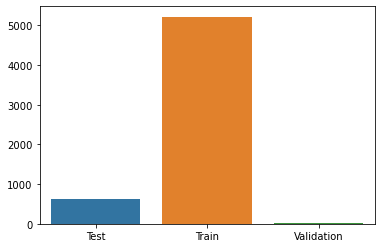

In [5]:
# plotting dataset size
sns.barplot(x=["Test","Train","Validation"],y=[len(os.listdir(data_test_normal))+len(os.listdir(data_test_pneumonia)),
                                               len(os.listdir(data_train_normal))+len(os.listdir(data_train_pneumonia)), 
                                               len(os.listdir(data_val_normal))+len(os.listdir(data_val_pneumonia))]);

>The split between the test, train, validation is uneven so it will be re-distributed to a 20:60:20 split respectively

In [6]:
# Creating directory variables
norm_dir = 'input/normal'
pne_dir = 'input/pneumonia'
new_dir = 'split/'

In [7]:
# adding images of the directory folder into a variable
norm_imgs = [file for file in os.listdir(norm_dir) if file.endswith('.jpeg')]
pne_imgs = [file for file in os.listdir(pne_dir) if file.endswith('.jpeg')]

In [8]:
print('There are', len(norm_imgs), 'normal images.')
print('There are', len(pne_imgs), 'pneumonia images.')

There are 1583 normal images.
There are 4273 pneumonia images.


The following steps only need to be completed once so they are commented out

In [9]:
# creating new directories
# os.mkdir(new_dir)

In [10]:
train_folder = os.path.join(new_dir, 'train')
train_norm = os.path.join(train_folder, 'norm')
train_pne = os.path.join(train_folder, 'pne')

test_folder = os.path.join(new_dir, 'test')
test_norm = os.path.join(test_folder, 'norm')
test_pne = os.path.join(test_folder, 'pne')

val_folder = os.path.join(new_dir, 'validation')
val_norm = os.path.join(val_folder, 'norm')
val_pne = os.path.join(val_folder, 'pne')

In [11]:
# os.mkdir(test_folder)
# os.mkdir(test_norm)
# os.mkdir(test_pne)

# os.mkdir(train_folder)
# os.mkdir(train_norm)
# os.mkdir(train_pne)

# os.mkdir(val_folder)
# os.mkdir(val_norm)
# os.mkdir(val_pne)

In [12]:
#determining 60:20:20 split normal
(len(norm_imgs)*60)/100, (len(norm_imgs)*20)/100

(949.8, 316.6)

In [13]:
# # train normal
# imgs = norm_imgs[:950]
# for img in imgs:
#     origin = os.path.join(norm_dir, img)
#     destination = os.path.join(train_norm, img)
#     shutil.copyfile(origin, destination)

# # validation normal
# imgs = norm_imgs[950:1266]
# for img in imgs:
#     origin = os.path.join(norm_dir, img)
#     destination = os.path.join(val_norm, img)
#     shutil.copyfile(origin, destination)

# # test normal
# imgs = norm_imgs[1266:]
# for img in imgs:
#     origin = os.path.join(norm_dir, img)
#     destination = os.path.join(test_norm, img)
#     shutil.copyfile(origin, destination)

In [14]:
# #determining 60:20:20 split pnemonia
# (len(pne_imgs)*60)/100, (len(pne_imgs)*20)/100

In [15]:
# # test pneumonia
# imgs = pne_imgs[:2564]
# for img in imgs:
#     origin = os.path.join(pne_dir, img)
#     destination = os.path.join(train_pne, img)
#     shutil.copyfile(origin, destination)

# # validation pneumonia
# imgs = pne_imgs[2564:3419]
# for img in imgs:
#     origin = os.path.join(pne_dir, img)
#     destination = os.path.join(val_pne, img)
#     shutil.copyfile(origin, destination)

# # test pneumonia
# imgs = pne_imgs[3419:]
# for img in imgs:
#     origin = os.path.join(pne_dir, img)
#     destination = os.path.join(test_pne, img)
#     shutil.copyfile(origin, destination)

In [16]:
print('There are', len(os.listdir(train_norm)), 'NORMAL images and ',
      len(os.listdir(train_pne)), 'Pneumonia images in the train set.')
print('There are', len(os.listdir(val_norm)), 'NORMAL images and ',
      len(os.listdir(val_pne)), 'Pneumonia images in the validation set.')
print('There are', len(os.listdir(test_norm)), 'NORMAL images and ', 
      len(os.listdir(test_pne)), 'Pneumonia images in the test set.')

print('There are', len(os.listdir(train_norm))+len(os.listdir(train_pne)), 'images in the train set.')
print('There are', len(os.listdir(val_norm))+len(os.listdir(val_pne)), 'images in the validation set')
print('There are', len(os.listdir(test_norm))+len(os.listdir(test_pne)), 'images in the test set.')

There are 950 NORMAL images and  2564 Pneumonia images in the train set.
There are 316 NORMAL images and  855 Pneumonia images in the validation set.
There are 317 NORMAL images and  854 Pneumonia images in the test set.
There are 3514 images in the train set.
There are 1171 images in the validation set
There are 1171 images in the test set.


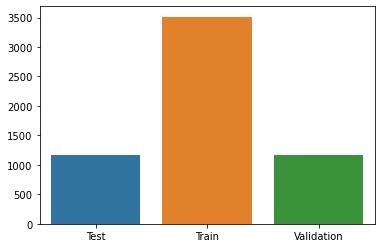

In [17]:
# confirming re-distribution was done correctly

sns.barplot(x=["Test","Train","Validation"],y=[len(os.listdir(test_norm))+len(os.listdir(test_pne)),
                                               len(os.listdir(train_norm))+len(os.listdir(train_pne)),
                                               len(os.listdir(val_norm))+len(os.listdir(val_pne))]);

> we balanced it out

## Class Imbalance

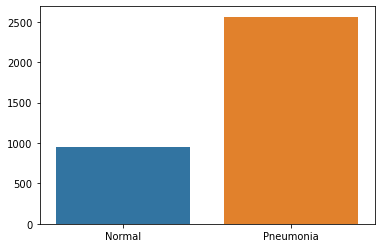

In [18]:
# Plotting distribution of target variable
sns.barplot(x=["Normal","Pneumonia"],y=[len(os.listdir(train_norm)),len(os.listdir(train_pne))]);

>We also see that there is class imbalance. Now, we will create image data generator. We will rescale the images by dividing the pixel values by 255. 
We will also configured the images to shape (220, 220) to maintain uniform size of the image.

In [19]:
# creating image data generator
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   zoom_range = 0.2)
val_datagen = ImageDataGenerator(rescale = 1./255.,)
test_datagen = ImageDataGenerator(rescale = 1./255.,)

train_generator = train_datagen.flow_from_directory(train_folder, batch_size=3514, class_mode='binary', target_size=(220, 220))
val_generator = val_datagen.flow_from_directory(val_folder, batch_size=1171, class_mode = 'binary', target_size=(220, 220))
test_generator = test_datagen.flow_from_directory(test_folder, batch_size=1171, shuffle=False, class_mode = 'binary', target_size=(220, 220))

Found 3514 images belonging to 2 classes.
Found 1171 images belonging to 2 classes.
Found 1171 images belonging to 2 classes.


TARGET SIZE - tuple of integers (height, width), default: (256, 256). The dimensions to which all images found will be resized.

In [20]:
#
test_images, test_labels = next(test_generator)

train_images, train_labels = next(train_generator)

val_images, val_labels = next(val_generator)


In [21]:
# exploring datasets
m_train = train_images.shape[0]
m_val = val_images.shape[0]
m_test = test_images.shape[0]

print ("Number of training samples: " + str(m_train))
print ("Number of testing samples: " + str(m_test))
print ("Number of validation samples: " + str(m_val))
print ("train_images shape: " + str(train_images.shape))
print ("train_labels shape: " + str(train_labels.shape))
print ("test_images shape: " + str(test_images.shape))
print ("test_labels shape: " + str(test_labels.shape))
print ("val_images shape: " + str(val_images.shape))
print ("val_labels shape: " + str(val_labels.shape))

Number of training samples: 3514
Number of testing samples: 1171
Number of validation samples: 1171
train_images shape: (3514, 220, 220, 3)
train_labels shape: (3514,)
test_images shape: (1171, 220, 220, 3)
test_labels shape: (1171,)
val_images shape: (1171, 220, 220, 3)
val_labels shape: (1171,)


In [22]:
# binary class
train_labels

array([0., 1., 0., ..., 0., 1., 1.], dtype=float32)

In [23]:
# reshaping 
train_img = train_images.reshape(train_images.shape[0], -1)
val_img = val_images.reshape(val_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)

print("Train shape: ", train_img.shape)
print("Validation shape: ", val_img.shape)
print("Test shape: ", test_img.shape)

Train shape:  (3514, 145200)
Validation shape:  (1171, 145200)
Test shape:  (1171, 145200)


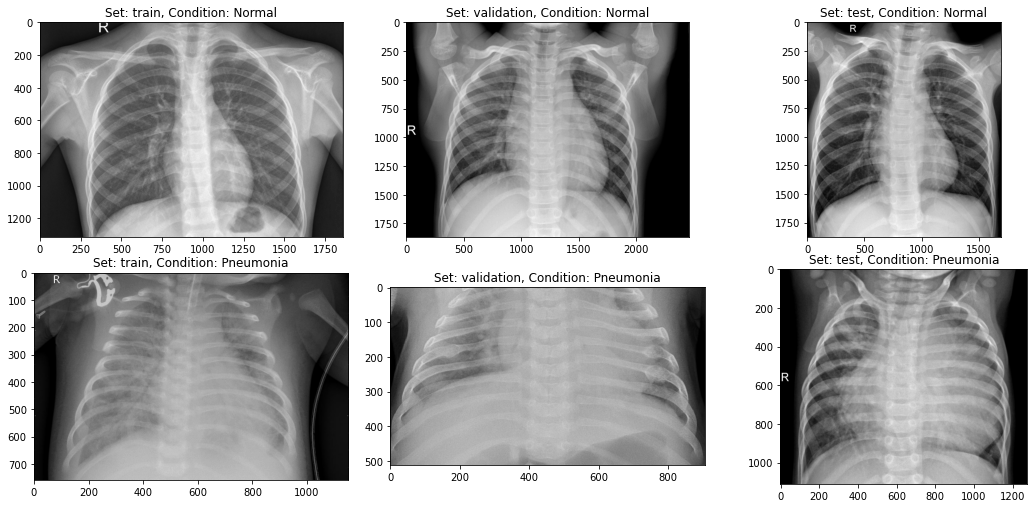

In [24]:
# plotting x-ray images
input_path = 'split/'
fig, ax = plt.subplots(2, 3, figsize=(15, 7))
ax = ax.ravel()
plt.tight_layout()
for i, _set in enumerate(['train', 'validation', 'test']):
    set_path = input_path+_set
    ax[i].imshow(plt.imread(set_path+'/norm/'+os.listdir(set_path+'/norm')[0]), cmap='gray')
    ax[i].set_title('Set: {}, Condition: Normal'.format(_set))
    ax[i+3].imshow(plt.imread(set_path+'/pne/'+os.listdir(set_path+'/pne')[0]), cmap='gray')
    ax[i+3].set_title('Set: {}, Condition: Pneumonia'.format(_set))

# Model Building

Now, we will build image classification models. We will start with a baseline model and then build on it. We will also utilize callbacks.EarlyStopping to save time and computational power as this will stop running when it realizes there is no more improvement can be made. 

We will set the early stopping to monitor 'accuracy' and continue training for 4 epochs before stopping.

## Baseline Model - Dummy Classifier

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       950
         1.0       0.73      1.00      0.84      2564

    accuracy                           0.73      3514
   macro avg       0.36      0.50      0.42      3514
weighted avg       0.53      0.73      0.62      3514



C:\Users\Jesus Baquiax\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


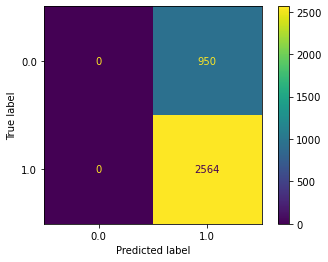

In [25]:
dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(train_img, train_labels)


dummy_y_pred = dummy_clf.predict(train_img)
print(classification_report(train_labels, dummy_y_pred))
print(plot_confusion_matrix(dummy_clf, train_img, train_labels))


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       317
         1.0       0.73      1.00      0.84       854

    accuracy                           0.73      1171
   macro avg       0.36      0.50      0.42      1171
weighted avg       0.53      0.73      0.62      1171



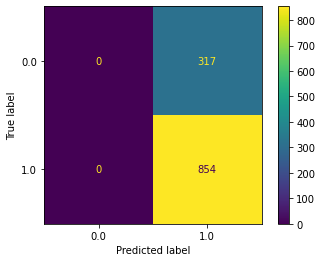

In [26]:
dummy_y_pred = dummy_clf.predict(test_img)
print(classification_report(test_labels, dummy_y_pred))
print(plot_confusion_matrix(dummy_clf, test_img, test_labels))

The baseline model shows an accuracy score of 73% which will be our baseline to determine how our other models perform in predicting whether an x-ray image has pnuemonia or not. The recall score will also be evaluated for each model to ensure that it is correctly identifying which patients has pneumonia. 

A high recall score lowers the chances of false negatives (x-ray image is negative when it is actually positive), but increases the chance of false positives (the x-ray image is postive when it is actually negative). 

## First Model

For the first model, we will use a Dense hidden layer with 20 neurons and a 'relu' activation function. ReLU is one of the most commonly used activation functions and it's especially useful in computer vision problems like image classification. 

Since this is a binary classification problem, our output layer will need to be a Dense layer where the number of neurons is the same as the number of classes in the labels. Thus, we will use 1 neuron and a 'sigmoid' activation function for the output layer.

We will compile this model with a 'sgd' (stochastic gradient descent) as the optimizer, 'binary_crossentropy' as the loss function, 'accuracy' as the metrics.

activation funcs: used to determine the output of neural network like yes or no. It maps the resulting values in between 0 to 1 or -1 to 1 etc. (depending upon the function)

Relu - Rectified Linear Unit


sigmoid - The main reason why we use sigmoid function is because it exists between (0 to 1). Therefore, it is especially used for models where we have to predict the probability as an output.Since probability of anything exists only between the range of 0 and 1, sigmoid is the right choice.

In [27]:
# creating an early stop variable
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=4)

In [28]:
# build a nueral network 
first_model = models.Sequential()
first_model.add(layers.Dense(20, activation='relu')) 
first_model.add(layers.Dense(1, activation='sigmoid'))

In [37]:
# compile and fit the model
first_model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

first_history = first_model.fit(train_img, train_labels,
                    epochs=50,
                    batch_size=32,
                    validation_data=(val_img, val_labels),
                    callbacks=callback)


Epoch 1/50
110/110 [==============================] - 3s 29ms/step - loss: 0.2945 - accuracy: 0.8765 - val_loss: 0.3100 - val_accuracy: 0.8574
Epoch 2/50
110/110 [==============================] - 2s 17ms/step - loss: 0.2882 - accuracy: 0.8776 - val_loss: 0.2746 - val_accuracy: 0.8787
Epoch 3/50
110/110 [==============================] - 2s 14ms/step - loss: 0.2798 - accuracy: 0.8791 - val_loss: 0.2196 - val_accuracy: 0.9086
Epoch 4/50
110/110 [==============================] - 1s 11ms/step - loss: 0.2797 - accuracy: 0.8819 - val_loss: 0.4147 - val_accuracy: 0.8061
Epoch 5/50
110/110 [==============================] - 1s 10ms/step - loss: 0.2884 - accuracy: 0.8756 - val_loss: 0.1857 - val_accuracy: 0.9342
Epoch 6/50
110/110 [==============================] - 1s 11ms/step - loss: 0.2711 - accuracy: 0.8830 - val_loss: 0.1917 - val_accuracy: 0.9274
Epoch 7/50
110/110 [==============================] - 1s 11ms/step - loss: 0.2757 - accuracy: 0.8802 - val_loss: 0.3654 - val_accuracy: 0.8480

In [38]:
# evaluate the train accuracy score
results_train = first_model.evaluate(train_img, train_labels)
print("Train Loss: {:.5f}".format(results_train[0]))
print("Train Accuracy: {:.2f}%".format(results_train[1] * 100))

110/110 [==============================] - 1s 6ms/step - loss: 0.2444 - accuracy: 0.8956
Train Loss: 0.24438
Train Accuracy: 89.56%


In [39]:
# evaluate the test accuracy score
results_test = first_model.evaluate(test_img, test_labels)
print("Test Loss: {:.5f}".format(results_test[0]))
print("Test Accuracy: {:.2f}%".format(results_test[1] * 100))

37/37 [==============================] - 0s 9ms/step - loss: 0.1982 - accuracy: 0.9308
Test Loss: 0.19820
Test Accuracy: 93.08%


In [40]:
first_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                2904020   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 21        
Total params: 2,904,041
Trainable params: 2,904,041
Non-trainable params: 0
_________________________________________________________________


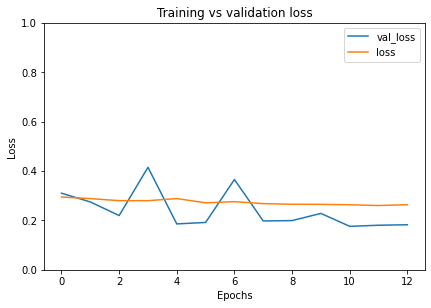

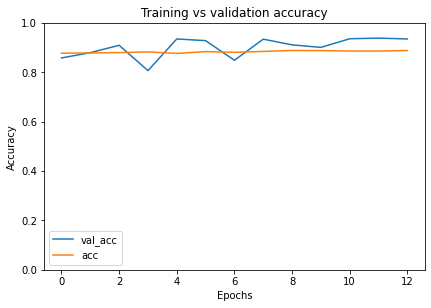

In [41]:
visualize_training_results(first_history)

In [42]:
preds = first_model.predict(test_img)

acc = accuracy_score(test_labels, np.round(preds))*100
cm = confusion_matrix(test_labels, np.round(preds))
tn, fp, fn, tp = cm.ravel()

print('CONFUSION MATRIX ------------------')
print(cm)

print('\nTEST METRICS ----------------------')
precision = tp/(tp+fp)*100
recall = tp/(tp+fn)*100
print('Accuracy: {}%'.format(acc))
print('Precision: {}%'.format(precision))
print('Recall: {}%'.format(recall))
print('F1-score: {}'.format(2*precision*recall/(precision+recall)))


CONFUSION MATRIX ------------------
[[262  55]
 [ 26 828]]

TEST METRICS ----------------------
Accuracy: 93.08283518360376%
Precision: 93.77123442808607%
Recall: 96.95550351288055%
F1-score: 95.33678756476682


UPDATE TEXT
> Our first model's train and test accuracy score is 73% which is the same as our baseline model. Will continue to add layers and tune parameters in order to improve the score.

## Second Model

The second model will have more hidden layers added to the first model and see how that improves the score.

In [43]:
# build a nueral network 
second_model = models.Sequential()
second_model.add(layers.Dense(20, activation='relu')) 
second_model.add(layers.Dense(7, activation='relu'))
second_model.add(layers.Dense(5, activation='relu'))
second_model.add(layers.Dense(1, activation='sigmoid'))

In [44]:
# compile and fit the model
second_model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

second_history = second_model.fit(train_img, train_labels,
                    epochs=50,
                    batch_size=32,
                    validation_data=(val_img, val_labels),
                    callbacks=callback)

Epoch 1/50
110/110 [==============================] - 2s 19ms/step - loss: 0.6857 - accuracy: 0.7228 - val_loss: 0.6492 - val_accuracy: 0.7301
Epoch 2/50
110/110 [==============================] - 1s 14ms/step - loss: 0.6351 - accuracy: 0.7297 - val_loss: 0.6228 - val_accuracy: 0.7301
Epoch 3/50
110/110 [==============================] - 1s 11ms/step - loss: 0.6146 - accuracy: 0.7297 - val_loss: 0.6072 - val_accuracy: 0.7301
Epoch 4/50
110/110 [==============================] - 1s 10ms/step - loss: 0.6026 - accuracy: 0.7297 - val_loss: 0.5981 - val_accuracy: 0.7301
Epoch 5/50
110/110 [==============================] - 1s 10ms/step - loss: 0.5954 - accuracy: 0.7297 - val_loss: 0.5925 - val_accuracy: 0.7301
Epoch 6/50
110/110 [==============================] - 1s 10ms/step - loss: 0.5910 - accuracy: 0.7297 - val_loss: 0.5890 - val_accuracy: 0.7301


In [46]:
# evaluate the train accuracy score
results_train2 = second_model.evaluate(train_img, train_labels)
print("Train Loss: {:.5f}".format(results_train[0]))
print("Train Accuracy: {:.2f}%".format(results_train[1] * 100))

110/110 [==============================] - 0s 4ms/step - loss: 0.5894 - accuracy: 0.7297
Train Loss: 0.58936
Train Accuracy: 72.97%


In [47]:
# evaluate the test accuracy score
results_test2 = second_model.evaluate(test_img, test_labels)
print("Test Loss: {:.5f}".format(results_test[0]))
print("Test Accuracy: {:.2f}%".format(results_test[1] * 100))

37/37 [==============================] - 0s 8ms/step - loss: 0.5896 - accuracy: 0.7293
Test Loss: 0.58963
Test Accuracy: 72.93%


In [48]:
second_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 20)                2904020   
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 147       
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 40        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 6         
Total params: 2,904,213
Trainable params: 2,904,213
Non-trainable params: 0
_________________________________________________________________


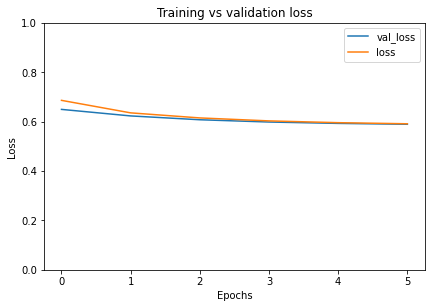

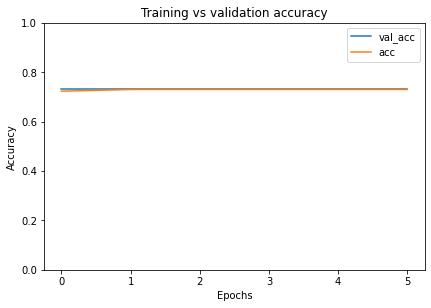

In [49]:
visualize_training_results(second_history)

In [50]:
preds = second_model.predict(test_img)

acc = accuracy_score(test_labels, np.round(preds))*100
cm = confusion_matrix(test_labels, np.round(preds))
tn, fp, fn, tp = cm.ravel()

print('CONFUSION MATRIX ------------------')
print(cm)

print('\nTEST METRICS ----------------------')
precision = tp/(tp+fp)*100
recall = tp/(tp+fn)*100
print('Accuracy: {}%'.format(acc))
print('Precision: {}%'.format(precision))
print('Recall: {}%'.format(recall))
print('F1-score: {}'.format(2*precision*recall/(precision+recall)))

CONFUSION MATRIX ------------------
[[  0 317]
 [  0 854]]

TEST METRICS ----------------------
Accuracy: 72.92912040990606%
Precision: 72.92912040990606%
Recall: 100.0%
F1-score: 84.34567901234568


UPDATE TEXT
> The second model train and test accuracy score is 89% and 92%, respectively. Adding more layers improved the model's performance tremendously. The recall score also has significantly improved.

## Third Model with CNN

Next, we will try Convolutional Neural Network(CNN) model. 

In [51]:
# build a CNN model
third_model = models.Sequential()
third_model.add(layers.Conv2D(32, (3, 3), activation='relu'))
third_model.add(layers.MaxPooling2D((2, 2)))

third_model.add(layers.Conv2D(32, (4, 4), activation='relu'))
third_model.add(layers.MaxPooling2D((2, 2)))

third_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
third_model.add(layers.MaxPooling2D((2, 2)))

third_model.add(layers.Flatten())
third_model.add(layers.Dense(64, activation='relu'))
third_model.add(layers.Dense(1, activation='sigmoid'))

In [52]:
# compile and fit the model
third_model.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['accuracy'])

class_weight = {0:2.0, 1:1.0}

third_history = third_model.fit(train_images,
                    train_labels,
                    epochs=20,
                    batch_size=32,
                    class_weight=class_weight,
                    validation_data=(val_images, val_labels),
                    callbacks=callback)

Epoch 1/20
110/110 [==============================] - 67s 610ms/step - loss: 0.8142 - accuracy: 0.7208 - val_loss: 0.5787 - val_accuracy: 0.7370
Epoch 2/20
110/110 [==============================] - 71s 648ms/step - loss: 0.6968 - accuracy: 0.7516 - val_loss: 0.5754 - val_accuracy: 0.6789
Epoch 3/20
110/110 [==============================] - 71s 643ms/step - loss: 0.5033 - accuracy: 0.8352 - val_loss: 0.2562 - val_accuracy: 0.9061
Epoch 4/20
110/110 [==============================] - 71s 644ms/step - loss: 0.4272 - accuracy: 0.8660 - val_loss: 0.3792 - val_accuracy: 0.8190
Epoch 5/20
110/110 [==============================] - 71s 648ms/step - loss: 0.4098 - accuracy: 0.8742 - val_loss: 0.2067 - val_accuracy: 0.9308
Epoch 6/20
110/110 [==============================] - 72s 653ms/step - loss: 0.3714 - accuracy: 0.8916 - val_loss: 0.2760 - val_accuracy: 0.8830
Epoch 7/20
110/110 [==============================] - 75s 678ms/step - loss: 0.3586 - accuracy: 0.8867 - val_loss: 0.1863 - val_ac

In [55]:
# evaluate the train accuracy score
results_train3 = third_model.evaluate(train_images, train_labels)
print("Train Loss: {:.5f}".format(results_train2[0]))
print("Train Accuracy: {:.2f}%".format(results_train2[1] * 100))

110/110 [==============================] - 13s 122ms/step - loss: 0.1187 - accuracy: 0.9582
Train Loss: 0.11871
Train Accuracy: 95.82%


In [56]:
# evaluate the test accuracy score
results_test3 = third_model.evaluate(test_images, test_labels)
print("Test Loss: {:.5f}".format(results_test2[0]))
print("Test Accuracy: {:.2f}%".format(results_test2[1] * 100))

37/37 [==============================] - 5s 122ms/step - loss: 0.2124 - accuracy: 0.9283
Test Loss: 0.21239
Test Accuracy: 92.83%


In [57]:
third_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 218, 218, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 109, 109, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 106, 106, 32)      16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 51, 51, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 40000)            

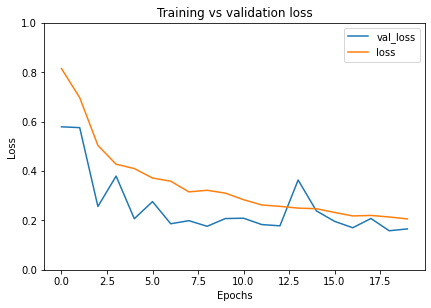

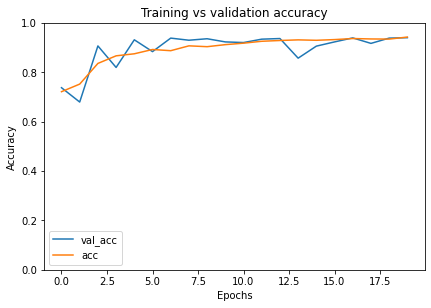

In [58]:
visualize_training_results(third_history)

In [59]:
preds = third_model.predict(test_images)

acc = accuracy_score(test_labels, np.round(preds))*100
cm = confusion_matrix(test_labels, np.round(preds))
tn, fp, fn, tp = cm.ravel()

print('CONFUSION MATRIX ------------------')
print(cm)

print('\nTEST METRICS ----------------------')
precision = tp/(tp+fp)*100
recall = tp/(tp+fn)*100
print('Accuracy: {}%'.format(acc))
print('Precision: {}%'.format(precision))
print('Recall: {}%'.format(recall))
print('F1-score: {}'.format(2*precision*recall/(precision+recall)))

CONFUSION MATRIX ------------------
[[272  45]
 [ 39 815]]

TEST METRICS ----------------------
Accuracy: 92.82664389410759%
Precision: 94.76744186046511%
Recall: 95.43325526932084%
F1-score: 95.09918319719952


>The Train accuracy score is 94% and the test accruracy score is 92%. It increased the train score but test score is the same as previous model. 

## Fourth Model with Transfer Learning

In [ ]:
input_shape = (220, 220, 3)

In [ ]:
tl_model = tf.keras.applications.ResNet50V2(weights='imagenet', input_shape=input_shape, include_top=False)

for layer in tl_model.layers:
    layer.trainable = False
    
final_model = Sequential()
final_model.add(tl_model)
final_model.add(GlobalAveragePooling2D())
final_model.add(Dense(128, activation = 'relu'))
final_model.add(Dropout(0.2))
final_model.add(Dense(1, activation='sigmoid'))

In [ ]:
final_model.compile(optimizer="adam", 
                    loss='binary_crossentropy', 
                    metrics=["accuracy"])

final_history = final_model.fit(train_generator, 
                                validation_data=val_generator, 
                                steps_per_epoch = 100, 
                                epochs=20, 
                                callbacks=callback)

In [ ]:
#final_model.save("final_model")

In [ ]:
# evaluate the train accuracy score
results_train_final = final_model.evaluate(train_img, train_labels)
print("Train Loss: {:.5f}".format(results_train_final[0]))
print("Train Accuracy: {:.2f}%".format(results_train_final[1] * 100))

In [ ]:
# evaluate the test accuracy score
results_test_final = final_model.evaluate(test_img, test_labels)
print("Test Loss: {:.5f}".format(results_test_final[0]))
print("Test Accuracy: {:.2f}%".format(results_test_final[1] * 100))

In [ ]:
final_model.summary()

In [ ]:
visualize_training_results(final_history)

In [ ]:
pred = final_model.predict(test_generator)

In [ ]:
y_pred = []
for prob in pred:
    if prob >= 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [ ]:

y_true = test_generator.classes

In [ ]:
cm = confusion_matrix(y_true, y_pred)

In [ ]:
sn.heatmap(cm, annot=True,cmap="Blues", annot_kws={"size": 16});

In [ ]:
print(classification_report(y_true, y_pred))

## Final Model / Conclusion
based on all our our models, XX model proved to perform the best because <<something about scores>> 
    
 pt1 - accur
    pt2 - recall
    pt3 - ???